<a href="https://colab.research.google.com/github/samirgadkari/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/module3-Intro-to-Keras/LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, \
                            mean_squared_error

import keras
from keras.datasets import boston_housing, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [0]:
np.random.seed(101)  # Set a fixed seed, so our values each time we run
                     # through the same steps are similar. There is still
                     # randomness inside the keras functions, so the values
                     # will not always be exactly the same.

In [177]:
help(boston_housing)

Help on module keras.datasets.boston_housing in keras.datasets:

NAME
    keras.datasets.boston_housing - Boston housing price regression dataset.

FUNCTIONS
    load_data(path='boston_housing.npz', test_split=0.2, seed=113)
        Loads the Boston Housing dataset.
        
        # Arguments
            path: path where to cache the dataset locally
                (relative to ~/.keras/datasets).
            test_split: fraction of the data to reserve as test set.
            seed: Random seed for shuffling the data
                before computing the test split.
        
        # Returns
            Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...

FILE
    /usr/local/lib/python3.6/dist-packages/keras/datasets/boston_housing.py




### Having a hard time finding the feature names of the boston housing dataset. help() and dir() are not enough.
### https://keras.io/datasets/#boston-housing-price-regression-dataset says this information is obtained from the dataset maintained by statlab at Carnegie Mellon University. Googling, I found this:
http://lib.stat.cmu.edu/datasets/boston

 CRIM     per capita crime rate by town (inversely proportional to prices)
 
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft. (so, if this is more, prices will be less)
 
 INDUS    proportion of non-retail business acres per town (so, if this is more, prices will be less)
 
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 NOX      nitric oxides concentration (parts per 10 million) (inversely proportional to prices)
 
 RM       average number of rooms per dwelling
 
 AGE      proportion of owner-occupied units built prior to 1940
 
 DIS      weighted distances to five Boston employment centres
 
 RAD      index of accessibility to radial highways
 
 TAX      full-value property-tax rate per $10,000
 
 PTRATIO  pupil-teacher ratio by town
 
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 LSTAT    % lower status of the population
 
 MEDV     Median value of owner-occupied homes in $1000's


In [135]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print('train_data.shape:', train_data.shape)
print('train_targets.shape:', train_targets.shape)
print('test_data.shape:', test_data.shape)
print('test_targets.shape:', test_targets.shape)

train_data.shape: (404, 13)
train_targets.shape: (404,)
test_data.shape: (102, 13)
test_targets.shape: (102,)


In [191]:
train_X_df = pd.DataFrame(data=train_data, 
                          columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                                   'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                                   'B By town', 'LSTAT %'])
train_X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B By town,LSTAT %
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [202]:
test_X_df = pd.DataFrame(data=test_data, 
                          columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                                   'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                                   'B By town', 'LSTAT %'])
test_X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B By town,LSTAT %
0,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05
1,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
2,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
3,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
4,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44


In [137]:
train_X_df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [138]:
train_targets[:20]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5])

In [139]:
train_targets[0].dtype

dtype('float64')

In [140]:
test_data[:10]

array([[1.80846e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.79000e-01,
        6.43400e+00, 1.00000e+02, 1.83470e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, 0.00000e+00, 5.47000e-01,
        5.91300e+00, 9.29000e+01, 2.35340e+00, 6.00000e+00, 4.32000e+02,
        1.78000e+01, 3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        5.98500e+00, 4.54000e+01, 4.81220e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 9.74000e+00],
       [1.27346e+00, 0.00000e+00, 1.95800e+01, 1.00000e+00, 6.05000e-01,
        6.25000e+00, 9.26000e+01, 1.79840e+00, 5.00000e+00, 4.03000e+02,
        1.47000e+01, 3.38920e+02, 5.50000e+00],
       [7.15100e-02, 0.00000e+00, 4.49000e+00, 0.00000e+00, 4.49000e-01,
        6.12100e+00, 5.68000e+01, 3.74760e+00, 3.00000e+00, 2.47000e+02,
        1.85000e+01, 3.95150e+02, 8.44000e+00],
       [2.79570e-01, 0.00000e+

In [141]:
test_targets[:10]

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2])

### All of our inputs/outputs are floats

## Normalize the data

In [0]:
def wrangle(data):
  return MinMaxScaler().fit_transform(data)

In [0]:
train_normalized_data = wrangle(train_data)
test_normalized_data  = wrangle(test_data)

In [144]:
model = Sequential()
model.add(Dense(3, input_dim=13, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 3)                 42        
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 3         
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [145]:
history = model.fit(train_data, train_targets, epochs=50)

Epoch 1/50
404/404 [==============================] - 0s 1ms/step - loss: 485.4597 - mean_squared_error: 485.4597
Epoch 2/50
404/404 [==============================] - 0s 43us/step - loss: 321.6359 - mean_squared_error: 321.6359
Epoch 3/50
404/404 [==============================] - 0s 41us/step - loss: 225.1457 - mean_squared_error: 225.1457
Epoch 4/50
404/404 [==============================] - 0s 36us/step - loss: 167.9033 - mean_squared_error: 167.9033
Epoch 5/50
404/404 [==============================] - 0s 41us/step - loss: 134.1261 - mean_squared_error: 134.1261
Epoch 6/50
404/404 [==============================] - 0s 38us/step - loss: 113.7699 - mean_squared_error: 113.7699
Epoch 7/50
404/404 [==============================] - 0s 39us/step - loss: 101.8972 - mean_squared_error: 101.8972
Epoch 8/50
404/404 [==============================] - 0s 52us/step - loss: 95.0035 - mean_squared_error: 95.0035
Epoch 9/50
404/404 [==============================] - 0s 42us/step - loss: 90.6749 

In [146]:
scores = model.evaluate(train_normalized_data, train_targets)
print(f'{model.metrics_names[0]}: {scores[0]}')
print(f'{model.metrics_names[1]}: {scores[1]}')
scores  = model.evaluate(test_normalized_data, test_targets)
print('scores:', scores)
print(f'{model.metrics_names[0]}: {scores[0]}')
print(f'{model.metrics_names[1]}: {scores[1]}')

404/404 [==============================] - 0s 445us/step
loss: 84.62254412811582
mean_squared_error: 84.62254412811582
102/102 [==============================] - 0s 54us/step
scores: [83.68787787942325, 83.68787787942325]
loss: 83.68787787942325
mean_squared_error: 83.68787787942325


In [0]:
def plot_history(name, marker):
  
  fig = plt.figure(figsize=(12, 8))
  metric = history.history[name]
  epoch_count = range(1, len(metric) + 1)
  plt.plot(epoch_count, metric, marker)
  plt.xlabel('epoch')
  plt.ylabel(name)
  plt.show();

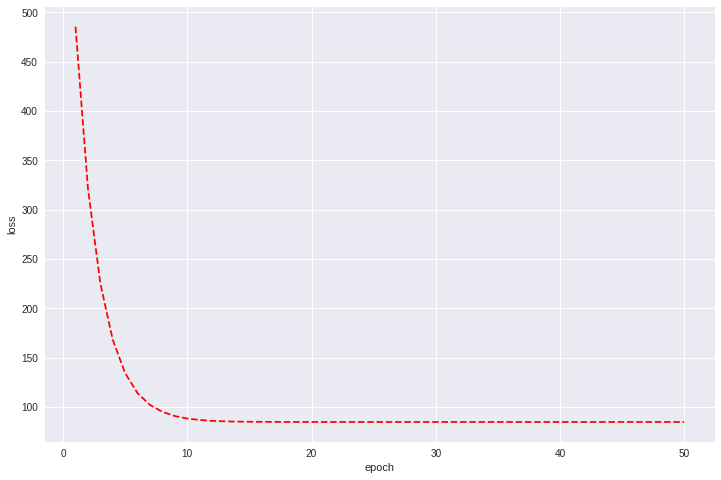

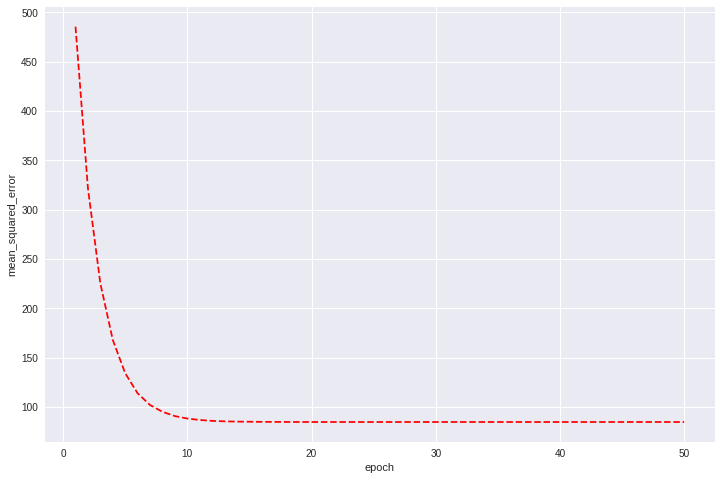

In [165]:
plot_history('loss', 'r--')
plot_history('mean_squared_error', 'r--')

## Linear Regression

In [216]:
model = LinearRegression().fit(train_normalized_data, train_targets)
y_pred = model.predict(test_normalized_data)
print('Mean Squared Error:', mean_squared_error(test_targets, y_pred))

Mean Squared Error: 40.60145446671504


### Deep Learning got me a mean-squared-error of 84.
### Linear Regression got me a mean-squared-error of 41.
## Feature Engineering


In [192]:
train_Y_df = pd.DataFrame(data=train_targets, columns=['y'])
data = pd.concat([train_X_df, train_Y_df], axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B By town,LSTAT %,y
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


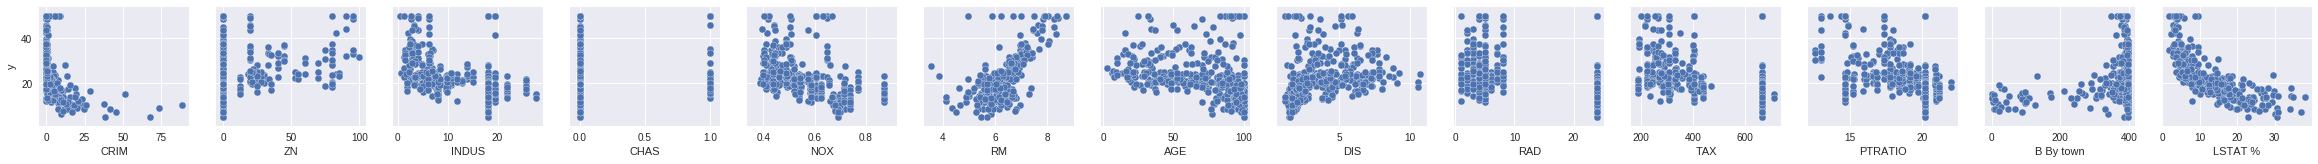

In [194]:
sns.pairplot(data=data, x_vars=data.drop(['y'], axis=1).columns, y_vars=['y'])

### From the above, we see that the number of rooms is a good positively correlated value to the price, and the LSTAT % is a good negatively correlated value to the price. So let's use only those two.

In [0]:
data2 = data[['RM', 'LSTAT %', 'y']]
X = data2[['RM', 'LSTAT %']]
y = data2['y']

In [204]:
test_Y_df = pd.DataFrame(data=test_targets, columns=['y'])
data = pd.concat([test_X_df, test_Y_df], axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B By town,LSTAT %,y
0,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05,7.2
1,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21,18.8
2,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74,19.0
3,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,27.0
4,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2


In [0]:
data2_test = data[['RM', 'LSTAT %', 'y']]
X_test = data2_test[['RM', 'LSTAT %']]
y_test = data2_test['y']

In [212]:
model = Sequential()
model.add(Dense(3, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [214]:
history = model.fit(X, y, epochs=50)
scores = model.evaluate(X, y)
print(f'{model.metrics_names[0]}: {scores[0]}')
print(f'{model.metrics_names[1]}: {scores[1]}')
scores  = model.evaluate(X_test, y_test)
print('scores:', scores)
print(f'{model.metrics_names[0]}: {scores[0]}')
print(f'{model.metrics_names[1]}: {scores[1]}')

Epoch 1/50
102/102 [==============================] - 0s 5ms/step - loss: 853.8984 - mean_squared_error: 853.8984
Epoch 2/50
102/102 [==============================] - 0s 111us/step - loss: 831.2115 - mean_squared_error: 831.2115
Epoch 3/50
102/102 [==============================] - 0s 78us/step - loss: 815.6051 - mean_squared_error: 815.6051
Epoch 4/50
102/102 [==============================] - 0s 65us/step - loss: 802.5552 - mean_squared_error: 802.5552
Epoch 5/50
102/102 [==============================] - 0s 61us/step - loss: 790.6150 - mean_squared_error: 790.6150
Epoch 6/50
102/102 [==============================] - 0s 66us/step - loss: 779.2352 - mean_squared_error: 779.2352
Epoch 7/50
102/102 [==============================] - 0s 73us/step - loss: 768.4630 - mean_squared_error: 768.4630
Epoch 8/50
102/102 [==============================] - 0s 73us/step - loss: 758.4986 - mean_squared_error: 758.4986
Epoch 9/50
102/102 [==============================] - 0s 70us/step - loss: 748.4

In [217]:
model = LinearRegression().fit(X, y)
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 23.969491575865415


### Looks like even after feature selection, our Linear Regression is better (and our neural network has gotten worse).

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [219]:
(train_data, train_targets), (test_data, test_targets) = fashion_mnist.load_data()
print('train_data.shape:', train_data.shape)
print('train_targets.shape:', train_targets.shape)
print('test_data.shape:', test_data.shape)
print('test_targets.shape:', test_targets.shape)

4423680/4422102 [==============================] - 1s 0us/step
train_data.shape: (60000, 28, 28)
train_targets.shape: (60000,)
test_data.shape: (10000, 28, 28)
test_targets.shape: (10000,)


In [245]:
# For now the global hyperparameters that we know of are:
#    batch size
#    epochs
# Pass these into the function
def run_network(batch_size, epochs, model_spec):
  
  def create_model(model_type):
    return {'sequential': Sequential()}.get(model_type, None)
  

  def create_layer(layer_type, layer):
    if layer_type == 'dense':
      if 'input_shape' in layer:
        return Dense(layer['nodes'], 
                     activation=layer['activation'], 
                     input_shape=layer['input_shape'])
      else:
        return Dense(layer['nodes'], 
                     activation=layer['activation'])
    elif layer_type == 'dropout':
      return Dropout(layer['fraction'])
    else:
      raise(ValueError, 'Layer unknown:', layer_type)
    

  num_classes = 10
  
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

  # Flatten the images
  x_train = x_train.reshape(60000, 784)
  x_test = x_test.reshape(10000, 784)

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')

  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)

  x_train /= 255
  x_test /= 255

  print(x_train.shape[0], 'train samples')
  print(x_test.shape[0], 'test samples')
  
  model = create_model(model_spec['type'])
  for layer in model_spec['layers']:
    model.add(create_layer(layer['type'], layer))
    
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  
  history = model.fit(x_train, y_train, epochs=epochs, validation_split=.1)
  scores = model.evaluate(x_test,y_test)

  return history, scores

model_spec = {'type': 'sequential',
              'layers': [{'type': 'dense', 'nodes': 16, 'activation': 'relu', 'input_shape': (784,)},
                         {'type': 'dropout', 'fraction': 0.1},
                         {'type': 'dense', 'nodes': 16, 'activation': 'relu'},
                         {'type': 'dropout', 'fraction': 0.1},
                         {'type': 'dense', 'nodes': num_classes, 'activation': 'softmax'}]}

all_histories = []
all_scores = []
# for batch_size in range(32, 130, 64):
#   for epochs in range(20, 101, 40):
#     history, scores = run_network(batch_size, epochs, model_spec)
    
#     all_histories.append(history)
#     all_scores.append(scores)

history, scores = run_network(32, 40, model_spec)
all_histories.append(history)
all_scores.append(scores)

model_spec = {'type': 'sequential',
              'layers': [{'type': 'dense', 'nodes': 16, 'activation': 'relu', 'input_shape': (784,)},
                         {'type': 'dropout', 'fraction': 0.1},
                         {'type': 'dense', 'nodes': 16, 'activation': 'relu'},
                         {'type': 'dropout', 'fraction': 0.1},
                         {'type': 'dense', 'nodes': 8, 'activation': 'relu'},
                         {'type': 'dropout', 'fraction': 0.1},
                         {'type': 'dense', 'nodes': num_classes, 'activation': 'softmax'}]}

history, scores = run_network(32, 40, model_spec)
all_histories.append(history)
all_scores.append(scores)



60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 16)                12560     
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_22 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==========================

In [246]:
model_spec = {'type': 'sequential',
              'layers': [{'type': 'dense', 'nodes': 8, 'activation': 'relu', 'input_shape': (784,)},
#                          {'type': 'dropout', 'fraction': 0.1},
                         {'type': 'dense', 'nodes': 8, 'activation': 'relu'},
#                          {'type': 'dropout', 'fraction': 0.1},
                         {'type': 'dense', 'nodes': 8, 'activation': 'relu'},
#                          {'type': 'dropout', 'fraction': 0.1},
                         {'type': 'dense', 'nodes': num_classes, 'activation': 'softmax'}]}

history, scores = run_network(32, 40, model_spec)
all_histories.append(history)
all_scores.append(scores)

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_77 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_78 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_79 (Dense)             (None, 10)                90        
Total params: 6,514
Trainable params: 6,514
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 6s 103us/step - loss: 0.8191 - acc: 0.7018 - val_loss: 0.5785 - val_acc: 0.7928
Epoch 2/40
54000/54000 [======================

In [247]:
model_spec = {'type': 'sequential',
              'layers': [{'type': 'dense', 'nodes': 8, 'activation': 'relu', 'input_shape': (784,)},
#                          {'type': 'dropout', 'fraction': 0.1},
                         {'type': 'dense', 'nodes': 8, 'activation': 'relu'},
#                          {'type': 'dropout', 'fraction': 0.1},
                         {'type': 'dense', 'nodes': 8, 'activation': 'relu'},
#                          {'type': 'dropout', 'fraction': 0.1},
                         {'type': 'dense', 'nodes': 8, 'activation': 'relu'},
                         {'type': 'dense', 'nodes': 8, 'activation': 'relu'},
                         {'type': 'dense', 'nodes': 8, 'activation': 'relu'},
                         {'type': 'dense', 'nodes': 8, 'activation': 'relu'},
                         {'type': 'dense', 'nodes': num_classes, 'activation': 'softmax'}]}

history, scores = run_network(32, 40, model_spec)
all_histories.append(history)
all_scores.append(scores)

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_81 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_82 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_83 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_84 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_85 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_86 (Dense)             (None, 8

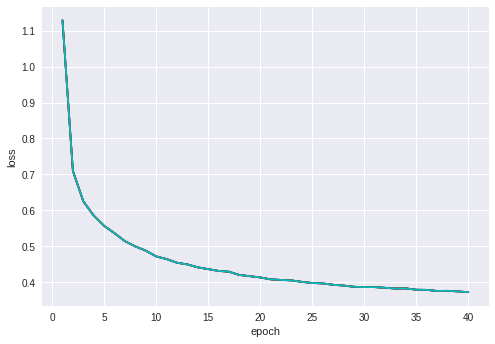

In [248]:
markers = ['b-', 'g-', 'r-', 'c-', 'm-', 'y-', 'k-']
for i in range(len(all_histories)):
  training_loss = history.history['loss']
  epoch_count = range(1, len(training_loss) + 1)

  plt.plot(epoch_count, training_loss, markers[i])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

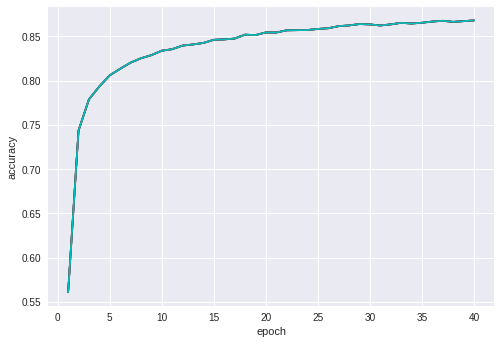

In [249]:
markers = ['b-', 'g-', 'r-', 'c-', 'm-', 'y-', 'k-']
for i in range(len(all_histories)):
  training_accuracy = history.history['acc']
  epoch_count = range(1, len(training_accuracy) + 1)

  plt.plot(epoch_count, training_accuracy, markers[i])

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### Our loss and accuracy functions are right on top of each other. So we could have used the least number of epochs and most number of batch size to select our model.

### Even after changing the number of nodes and the number of hidden layers, we don't see any changes in the curves.

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.